# Práctica 6 - Clasificador de imágenes con perceptrón

Guarda una copia de este cuaderno en tu Google Drive para poder editarla y ejecutarla.

El propio cuaderno será tu informe del trabajo. Puedes añadir tantas secciones de código y de texto como consideres necesario para resolver todos los ejercicios propuestos y analizar los resultados obtenidos. Una vez hayas terminado, descarga el notebook en formato ipynb y súbelo a Moodle en la tarea habilitada para la práctica con el nombre NIP_P6_MLP.ipynb

Es **obligatorio** que se **guarden los resultados de la evaluación** de cada celda de código (para no tener que volver a ejecutarlas). Por defecto los notebooks estan configurados así (Edit→Notebook Settings → NUNCA actives: Omit code cell output when saving this notebook)

Imports necesarios para ejecutar el trabajo

In [2]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

import time
import numpy as np
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')
        return

    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)

    ## Loss
    fig, axs = plt.subplots(1, 2,  figsize=(12, 6))
    for l in loss_list:
        axs[0].plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        axs[0].plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))

    axs[0].set(title='Loss', xlabel='Epochs', ylabel='Loss')
    axs[0].grid()
    axs[0].legend()

    ## Accuracy
    for l in acc_list:
        axs[1].plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        axs[1].plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    axs[1].set(title='Accuracy', xlabel='Epochs', ylabel='Accuracy')
    axs[1].grid()
    axs[1].legend()
    plt.show()

Carga del dataset MNIST

In [4]:
verbose = True

print('Loading MNIST dataset...')
# Problem dimensions
img_rows, img_cols = 28, 28
num_pixels = img_rows * img_cols
num_classes = 10
# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, num_pixels)
x_test = x_test.reshape(10000, num_pixels)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test,  num_classes)

np.random.seed(0)
p = np.arange(x_train.shape[0])
np.random.shuffle(p)
x_train = x_train[p]
y_train = y_train[p]


Loading MNIST dataset...
11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


Ejemplo de definición de la arquitectura de una red y de los parámetros de la optimización.

In [ ]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Código para entrenar la red neuronal utilizando la función FIT

Observa como incluye un argumento para hacer separación de datos de validación



Epoch 1/20
422/422 [==============================] - 6s 5ms/step - loss: 0.7028 - accuracy: 0.8269 - val_loss: 0.4145 - val_accuracy: 0.8928
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3722 - accuracy: 0.9009 - val_loss: 0.3439 - val_accuracy: 0.9075
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3259 - accuracy: 0.9104 - val_loss: 0.3175 - val_accuracy: 0.9132
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3042 - accuracy: 0.9152 - val_loss: 0.3063 - val_accuracy: 0.9153
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2915 - accuracy: 0.9189 - val_loss: 0.2941 - val_accuracy: 0.9177
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2828 - accuracy: 0.9215 - val_loss: 0.2886 - val_accuracy: 0.9193
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2763 - accuracy: 0.9234 - val_loss: 0.2857 - val_accuracy: 0.9193
Epoch 

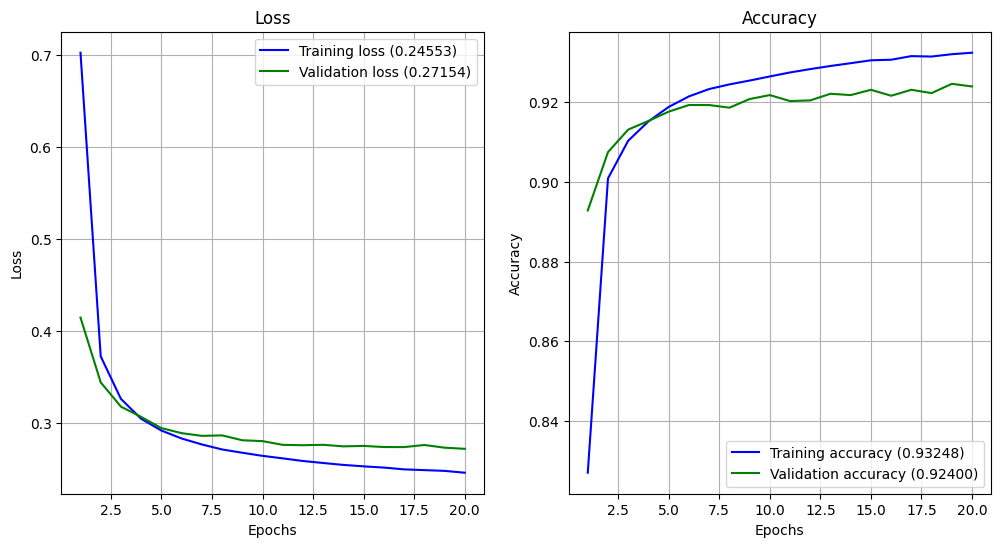

In [ ]:
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,
                    callbacks=[earlystop],
                    verbose=verbose)

train_time = time.perf_counter() - t0
print('%s %.3f%s' %  ('Training time: ', train_time, 's') )
plot_history(history)

## Preguntas a responder de la celda anterior


### 1 - ¿Qué representan los parámetros batch_size y epochs? (Respuesta dos líneas max).

El parametro batch_size es el numero de samples usados en cada iteracion de entrenamiento.

El parametro epochs es el numero de veces que se itera sobre las muestras

### 2 - Explica las dos gráficas que se muestran al finalizar el entrenamiento.

La grafica de loss significa la cantidad de error del modelo.
Cuanto mas se separa de la linea de validación significa que probablemente hay un sobreajuste. Cuanto mas cerca este mejor.

La grafica de accuracy es la tasa de aciertos y se ve como va progresando, conforme mas aumentan los epoch(numeo de iteraciones) va aunmentado el acierto.

Evaluación de la red

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    #plt.tight_layout()


def plot_mnist_confusion_matrix(y_test, y_pred, normalize=False):
    class_names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    y_tst = [np.argmax(y) for y in y_test]
    y_prd = [np.argmax(y) for y in y_pred]

    cnf_matrix = confusion_matrix(y_tst, y_prd)

    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          normalize=normalize)

Accuracy train:  93.31%
Accuracy test:   92.77%
313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


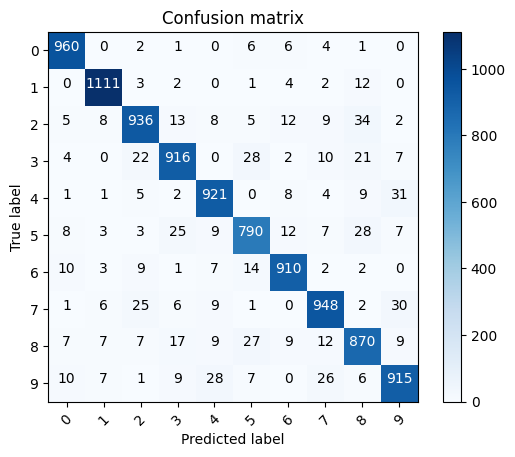

In [ ]:
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')

## Preguntas a responder de la celda anterior

### 3 - Explica la gráfica que se muestra

Es la tabla de confusion que sirve para analizar la precision y recall del clasificador, la diagonal del centro es el numero de aciertos y el resto de valores son los que ha clasificado incorrectamente, y asi poder realizar un analisis mas exaustivo de los fallos.

## TRABAJO PRÁCTICO


**Trabajo práctico**: incluye a continuación las secciones de código para probar las diferentes redes.
No incluyas una sección para cada red que pruebes. El notebook que entregues deberá incluir:


4.1.   La mejor red obtenida para el caso de una capa

4.2.   La mejor red obtenida para el caso de dos capas

4.3.   La mejor red obtenida para el caso de tres capas

4.4.   Ejemplo de red en la que se produzca sobreajuste al entrenar

4.5.   Modificación de la red anterior utilizando técnicas para evitar el sobreajuste

4.6.   Incluye en una sección de texto una tabla en la que aparezca resumido el conjunto de pruebas realizado y los resultados obtenidos en cada caso (nº capas, nº neuronas, accuracy, técnicas de sobreajuste, etc.). Incluye en esta sección también las conclusiones obtenidas del trabajo.

4.7.   Recuerda mostrar y comentar algún ejemplo de imagen mal clasificada por la red que mejor se comporte.

1. Mejor red para una capa

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 4s 7ms/step - loss: 0.0294 - accuracy: 0.8261 - val_loss: 0.0174 - val_accuracy: 0.8950
Epoch 2/20
422/422 [==============================] - 2s 5ms/step - loss: 0.0156 - accuracy: 0.9055 - val_loss: 0.0146 - val_accuracy: 0.9103
Epoch 3/20
422/422 [==============================] - 2s 6ms/step - loss: 0.0137 - accuracy: 0.9154 - val_loss: 0.0135 - val_accuracy: 0.9177
Epoch 4/20
422/422 [==============================] - 3s 7ms/step - loss: 0.0128 - accuracy: 0.9201 - val_loss: 0.0129 - 

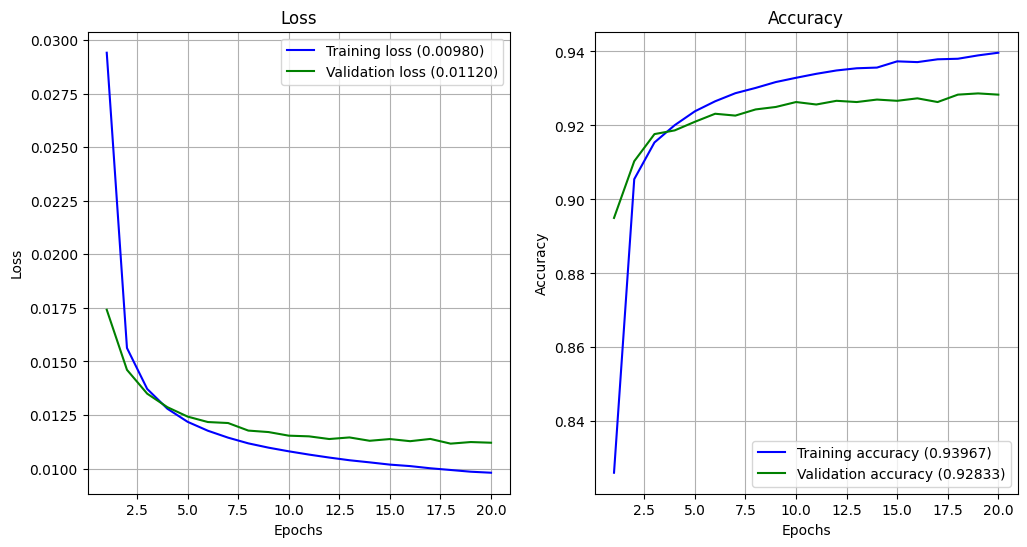

Accuracy train:  93.99%
Accuracy test:   93.24%
313/313 [==============================] - 0s 1ms/step
Confusion matrix, without normalization


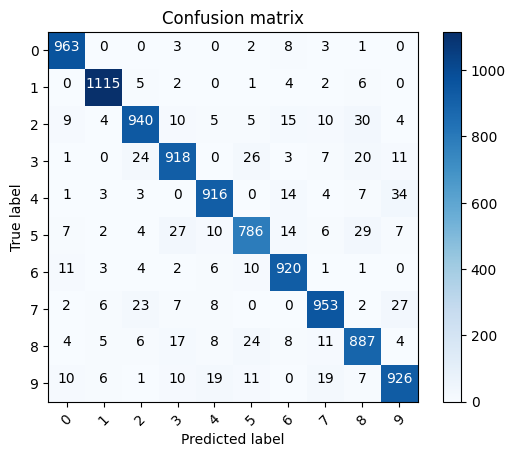

In [ ]:
# CODIGO NECESARIO PARA RESPONDER LAS PREGUNTAS de la 4.1 a la 4.5
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(num_pixels,)))
model.compile(loss='mean_squared_error', optimizer=Adam(),metrics=['accuracy'])
model.summary()
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
batch_size=128,
epochs=20,
validation_split=0.1,
callbacks=[earlystop],
verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's') )
plot_history(history)
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')


Mejor capa 2

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 100)               78500     
                                                                 
 dense_50 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 5s 8ms/step - loss: 0.3918 - accuracy: 0.8925 - val_loss: 0.2320 - val_accuracy: 0.9340
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1909 - accuracy: 0.9454 - val_loss: 0.1707 - val_accuracy: 0.9513
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1420 - accuracy: 0.9588 - val_loss: 0.1364 - val_ac

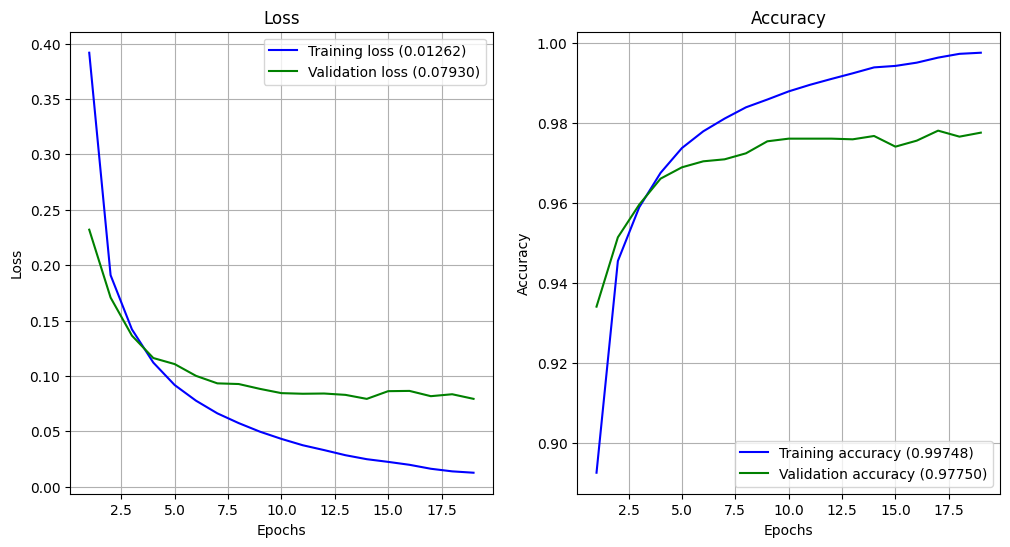

Accuracy train:  99.66%
Accuracy test:   97.68%
313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


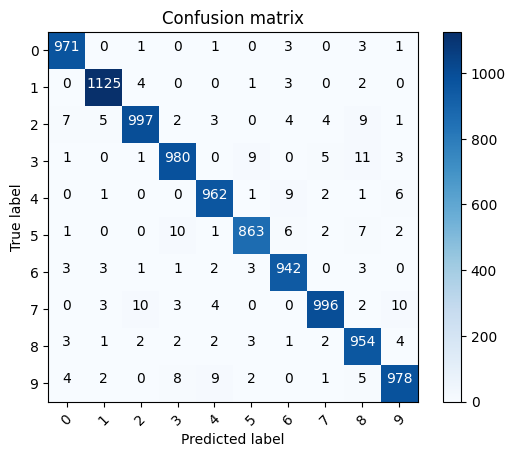

In [ ]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(10, activation='softmax', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
model.summary()
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
batch_size=128,
epochs=20,
validation_split=0.1,
callbacks=[earlystop],
verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's') )
plot_history(history)
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')


Mejor 3 capas

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.3414 - accuracy: 0.9036 - val_loss: 0.1845 - val_accuracy: 0.9462
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.1533 - accuracy: 0.9550 - val_loss: 0.1287 - val_accuracy: 0.9

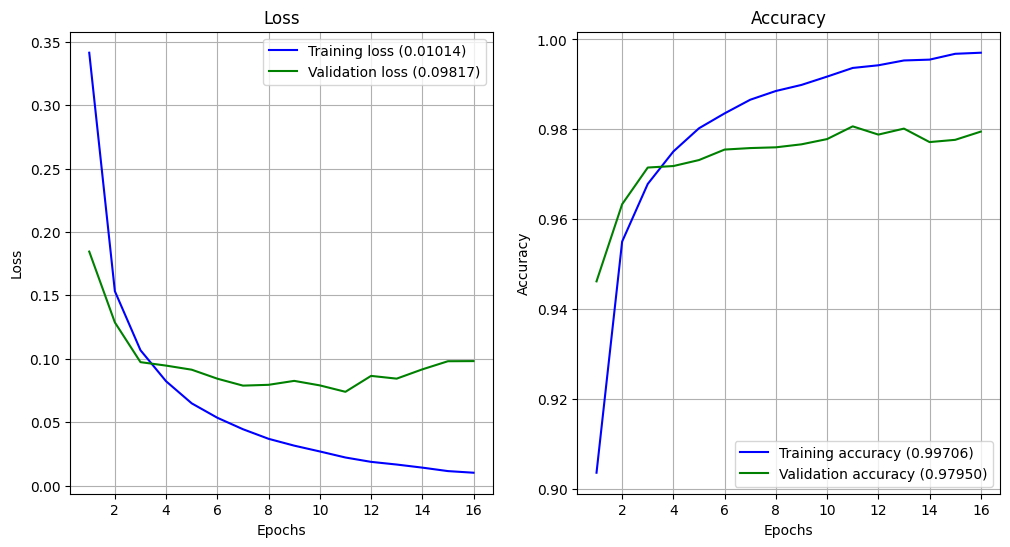

Accuracy train:  99.63%
Accuracy test:   97.79%
313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


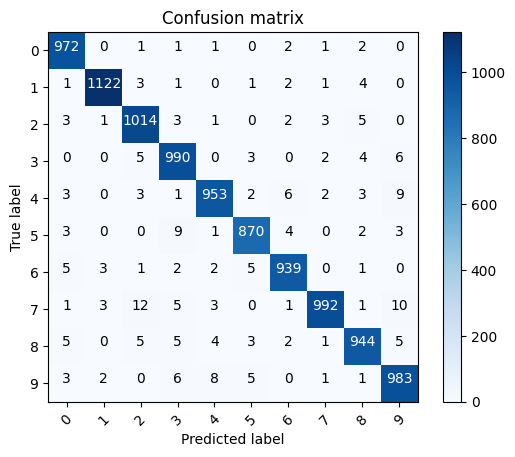

In [13]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(100, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(10, activation='softmax', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])
model.summary()
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
batch_size=128,
epochs=20,
validation_split=0.1,
callbacks=[earlystop],
verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's') )
plot_history(history)
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')


4. Ejemplo de desajuste, si eleminamos el callback del earlystop vemos claramente como en la grafica hay una gran separación entre el training y el validation


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3601 - accuracy: 0.8987 - val_loss: 0.1909 - val_accuracy: 0.9433
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1513 - accuracy: 0.9559 - val_loss: 0.1296 - val_accuracy: 0.9

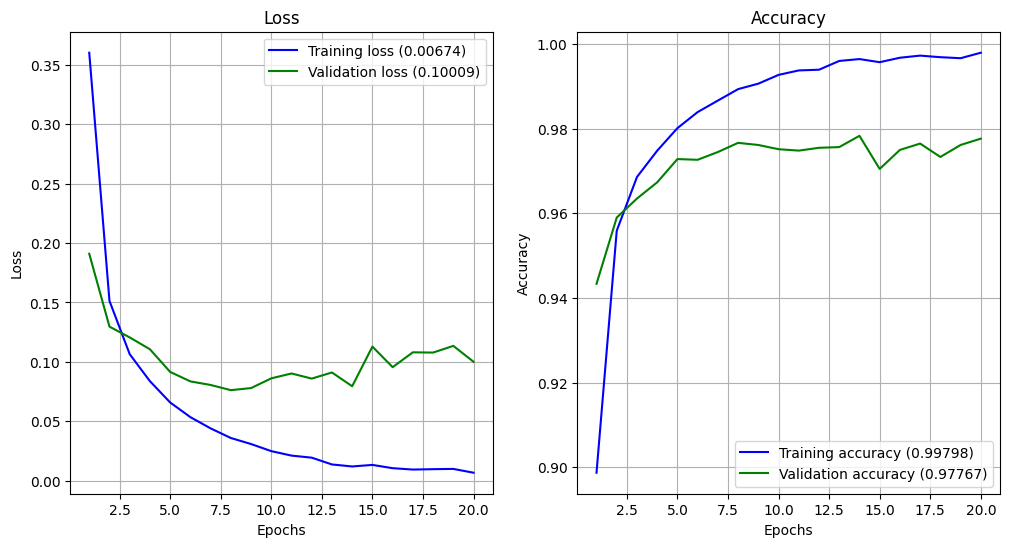

Accuracy train:  99.67%
Accuracy test:   97.63%
313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


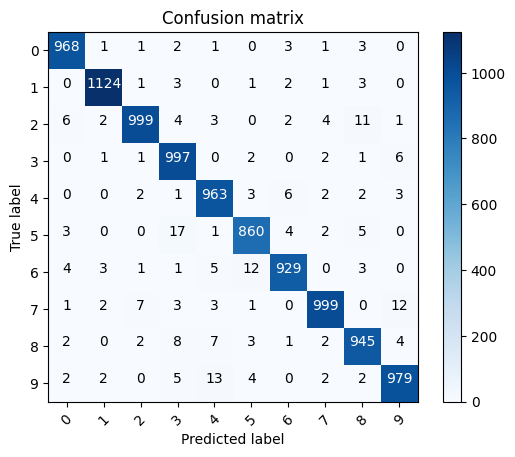

In [8]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(100, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(10, activation='softmax', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
model.summary()
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
batch_size=128,
epochs=20,
validation_split=0.1,
#callbacks=[earlystop],
verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's') )
plot_history(history)
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')


5. Modificamos el ejemplo anterior para intentar que haya menos desajuste, estableciendo un valor de dropout

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.3673 - accuracy: 0.8963 - val_loss: 0.1831 - val_accuracy: 0.9472
Epoch 2/20
422/422 [==============================] - 1s 4ms/step - loss: 0.1556 - accuracy: 0.9536 - val_loss: 0.1381 - val_accuracy: 0.9

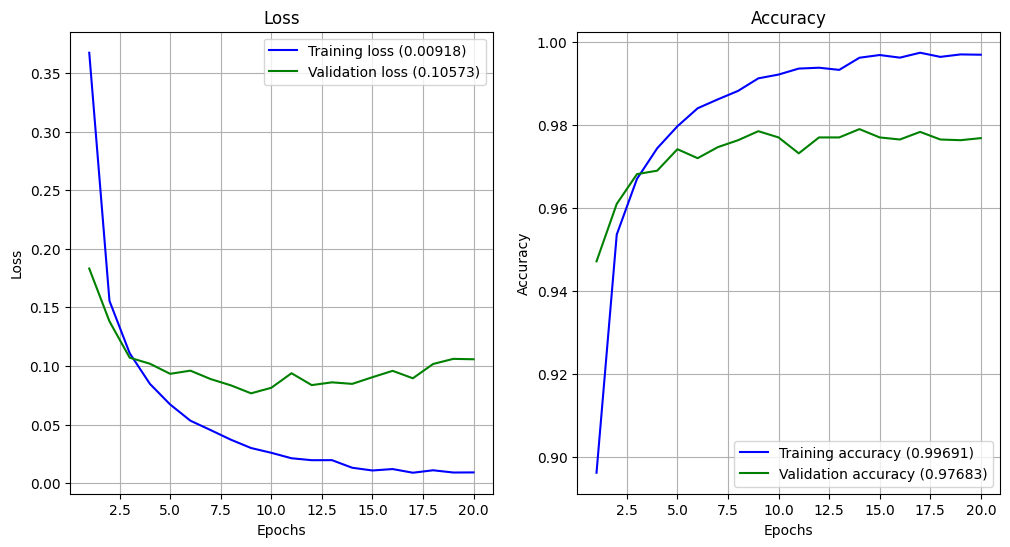

Accuracy train:  99.50%
Accuracy test:   97.66%
313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


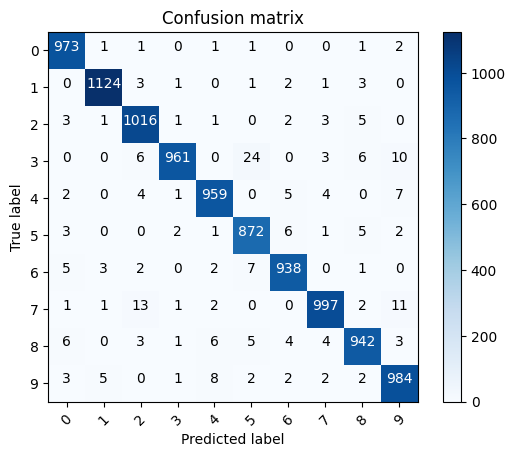

In [9]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
dropout_layer= Dropout(0.5)
# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(100, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(10, activation='softmax', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
model.summary()
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
batch_size=128,
epochs=20,
validation_split=0.1,
#callbacks=[earlystop],
verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's') )
plot_history(history)
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')


### 4 - Respuestas a las preguntas 4.6 y 4.7

6. Tablas con datos de distintas pruebas: nº capas, nº neuronas, accuracy, técnicas de sobreajuste

Pruebas con 1 capa:

| nº neuronas | activacion | loss                     | optimizador | accuracy |
|-------------|------------|--------------------------|-------------|----------|
| 10          | softmax    | mean_squared_error       | RMSprop()   | 93.15%   |
| 10          | sigmoid    | mean_squared_error       | RMSprop()   | 91.60%   |
| 10          | softmax    | categorical_crossentropy | SGD()       | 90.10%   |
| 10          | softmax    | mean_squeared_error      | SGD()       | 77.89%   |
| 10          | softmax    | categorical_crossentropy | ADAM()      | 91.8%    |
| 10          | softmax    | categorical_crossentropy | Adam()      | 93.26%   |
| 10          | softmax    | mean_squeared_error      | Adam()      | 93.99%   |
| 10          | sigmoid    | mean_squared_error       | Adam()      | 92.35%   |
  

Pruebas con 2 capas

| 2 capa nº neuronas | activacion 2 capa | loss                     | optimizador | accuracy |
|--------------------|-------------------|--------------------------|-------------|----------|
| 10000              | relu              | mean_squared_error       | RMSprop()   | 99.45%   |
| 100                | relu              | mean_squared_error       | RMSprop()   | 98.80%   |
| 50                 | relu              | mean_squared_error       | RMSprop()   | 98.24%   |
| 100                | sigmoid           | mean_squeared_error      | SGD()       | 53.89%   |
| 100                | sigmoid           | categorical_crossentropy | ADAM()      | 91.84%   |
| 100                | relu              | mean_squeared_error      | Adam()      | 99.38%   |
| 100                | sigmoid           | mean_squeared_error      | Adam()      | 98.89%   |
| 100                | relu              | categorical_crossentropy | Adam()      | 99.66%   |
| 100                | relu              | categorical_crossentropy | RMSprop()   | 99.41%   |

Pruebas con 3 capas


| 3 capa nº neuronas | activacion 3 capa | loss                     | optimizador | accuracy |
|--------------------|-------------------|--------------------------|-------------|----------|
|                    |                   |                          |             |          |
| 100                | relu              | mean_squared_error       | SGD()       | 75.24%   |
| 100                | sigmoid           | mean_squeared_error      | SGD()       | 40.06%   |
| 100                | sigmoid           | categorical_crossentropy | ADAM()      | 91.84%   |
| 100                | relu              | mean_squeared_error      | Adam()      | 99.31%   |
| 100                | relu              | categorical_crossentropy | Adam()      | 99.67%   |
| 100                | relu              | categorical_crossentropy | RMSprop()   | 99.56%   |

7. Ejemplos  de imagen mal clasificada por la red que mejor se comporte.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 100)               78500     
                                                                 
 dense_28 (Dense)            (None, 100)               10100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 3s 5ms/step - loss: 0.3462 - accuracy: 0.9042 - val_loss: 0.1849 - val_accuracy: 0.9457
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.1458 - accuracy: 0.9575 - val_loss: 0.1220 - val_accuracy: 0.9

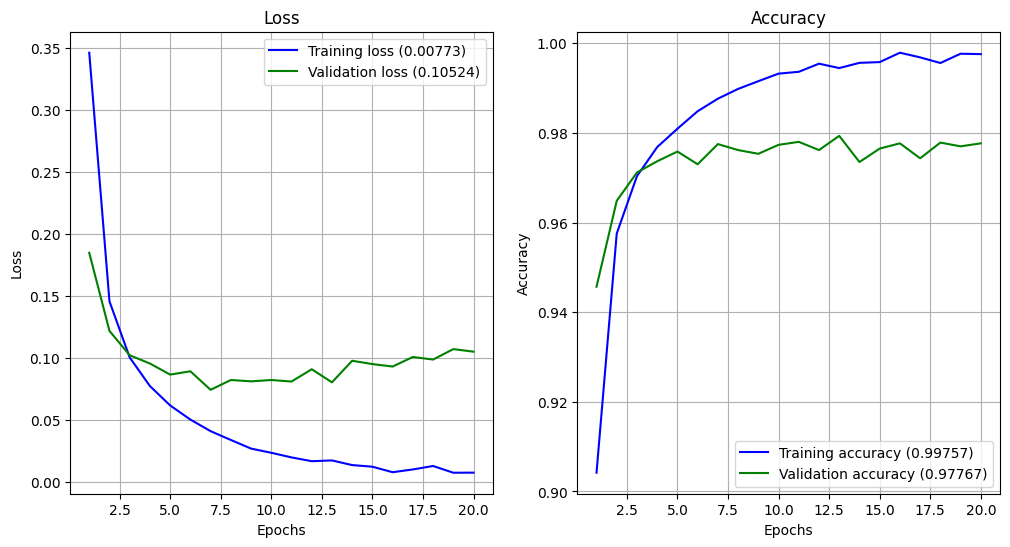

Accuracy train:  99.62%
Accuracy test:   97.61%
313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


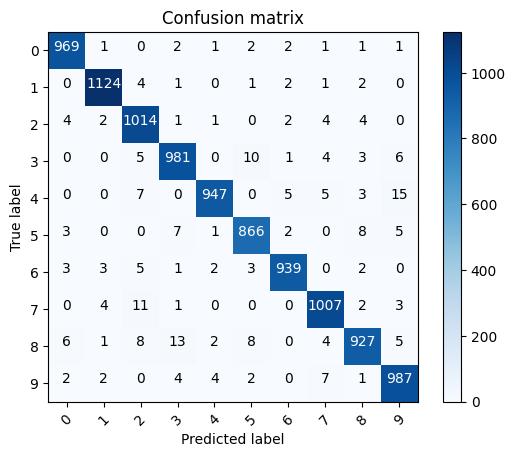

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


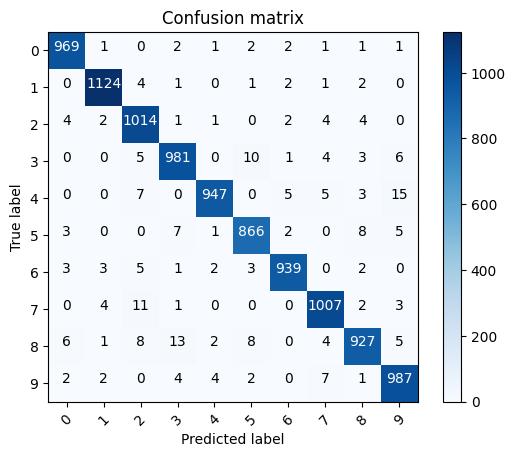

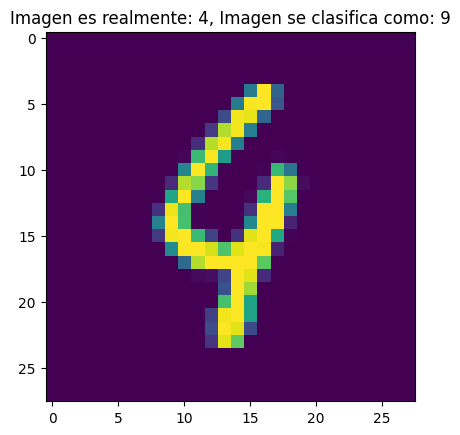

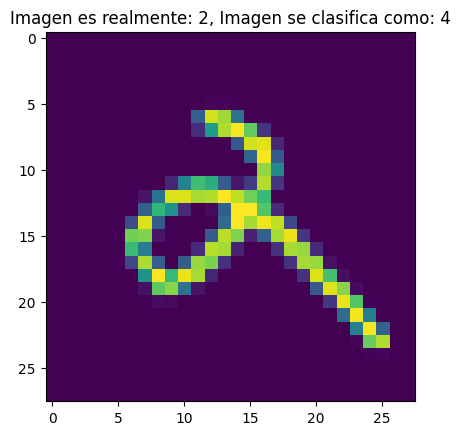

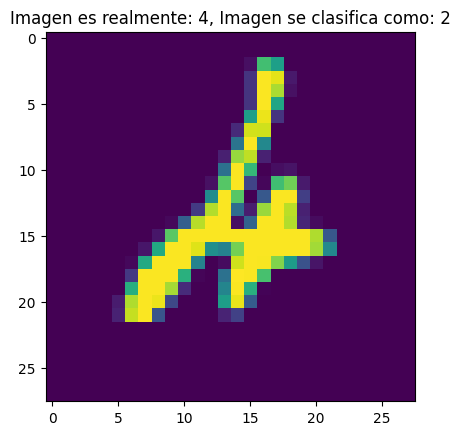

In [24]:
# Función para parar cuando ya no mejora el error en los datos de validacion
earlystop=EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# Perceptron de un solo nivel
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(100, activation='relu', input_shape=(num_pixels,)))
model.add(Dense(10, activation='softmax', input_shape=(num_pixels,)))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
model.summary()
t0 = time.perf_counter()
history = model.fit(x_train, y_train,
batch_size=128,
epochs=20,
validation_split=0.1,
#callbacks=[earlystop],
verbose=verbose)
train_time = time.perf_counter() - t0
print('%s %.3f%s' % ('Training time: ', train_time, 's') )
plot_history(history)
# Evaluar la red
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('%s %2.2f%s' % ('Accuracy train: ', 100*train_score[1], '%' ))
print('%s %2.2f%s' % ('Accuracy test:  ', 100*test_score[1], '%'))

y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')


y_pred = model.predict(x_test)
plot_mnist_confusion_matrix(y_test, y_pred, normalize=False)
# Standard confusion matrix plot
#cm=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
#plt.imshow(cm, cmap='Blues')
#Funcion para comprobar las imagenes mal clasificadas
cont = 0
#Recorro la longitud de todos los test
for i in range(len(x_test)):
    #Si la prediccion es distinta del resultado real
    if np.argmax(y_pred[i]) != np.argmax(y_test[i]):
        plt.imshow(x_test[i].reshape(28, 28))
        #Muestro las imagenes mal clasificas y como las clasifica realmente
        plt.title("Imagen es realmente: " + str(np.argmax(y_test[i])) + ", Imagen se clasifica como: " + str(np.argmax(y_pred[i])))
        plt.show()
        cont = cont + 1
        if cont == 3:
            break
